# Viewing both datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

# Read and count samples for real kaggle set
kaggle_dataset = pd.read_csv("creditcard.csv")
kaggle_non_fraud_counts = kaggle_dataset["Class"].value_counts()[0]
kaggle_fraud_counts = kaggle_dataset["Class"].value_counts()[1]
kaggle_non_fraud_samples = kaggle_dataset.loc[kaggle_dataset["Class"] == 0]
kaggle_fraud_samples = kaggle_dataset.loc[kaggle_dataset["Class"] == 1]

# Read and count samples for simulated set
simulated_test = pd.read_csv("fraudTest.csv")
simulated_train = pd.read_csv("fraudTrain.csv")
simulated_dataset = pd.concat([simulated_train, simulated_test])
simulated_dataset = simulated_dataset.set_index("Unnamed: 0")

# Rename columns to match real dataset
simulated_dataset = simulated_dataset.rename(columns={"unix_time": "Time", "amt": "Amount", "is_fraud": "Class"})

# Subtract Min UnixTime to start time from first transaction (Like the real dataset)
simulated_dataset["Time"] -= min(simulated_dataset["Time"])

simulated_non_fraud_counts = simulated_dataset["Class"].value_counts()[0]
simulated_fraud_counts = simulated_dataset["Class"].value_counts()[1]

# Check for any null values
print("KAGGLE NULL VALUES:", kaggle_dataset.isnull().values.any())
print("SIMULATED NULL VALUES:", simulated_dataset.isnull().values.any())
print()

# Print number of fraud/non-fraud counts
print("Number of Kaggle samples:")
print(" Non-Fraud:", kaggle_non_fraud_counts)
print("     Fraud:", kaggle_fraud_counts)
print("     Total:", kaggle_non_fraud_counts + kaggle_fraud_counts)
# The classes are heavily skewed we need to solve this issue later.
print("Non-Frauds", round(kaggle_non_fraud_counts/(kaggle_non_fraud_counts + kaggle_fraud_counts) * 100,2), '% of the dataset')
print("Frauds", round(kaggle_fraud_counts/(kaggle_non_fraud_counts + kaggle_fraud_counts) * 100,2), '% of the dataset')
print()
print("Number of Simulated samples:")
print(" Non-Fraud:", simulated_non_fraud_counts)
print("     Fraud:", simulated_fraud_counts)
print("     Total:", simulated_non_fraud_counts + simulated_fraud_counts)
print("Non-Frauds", round(simulated_non_fraud_counts/(simulated_non_fraud_counts + simulated_fraud_counts) * 100,2), '% of the dataset')
print("Frauds", round(simulated_fraud_counts/(simulated_non_fraud_counts + simulated_fraud_counts) * 100,2), '% of the dataset')

KAGGLE NULL VALUES: False
SIMULATED NULL VALUES: False

Number of Kaggle samples:
 Non-Fraud: 284315
     Fraud: 492
     Total: 284807
Non-Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset

Number of Simulated samples:
 Non-Fraud: 1842743
     Fraud: 9651
     Total: 1852394
Non-Frauds 99.48 % of the dataset
Frauds 0.52 % of the dataset


In [2]:
# Select same number of samples for simulated set as real kaggle set
simulated_non_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 0]
simulated_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 1]

In [3]:
def print_header(transaction_type):
    if transaction_type == "fraud":
        # Compare simulated and real amounts for fraud transactions
        print("----------------------------------------------------------------------------")
        print("| FIELDS |   SIMULATED FRAUD  ", "|", "    REAL FRAUD     | DIFFERENCE FROM REAL |")
        print("----------------------------------------------------------------------------")
    else:  
        print("----------------------------------------------------------------------------")
        print("| FIELDS | SIMULATED NON-FRAUD", "|", "  REAL NON-FRAUD   | DIFFERENCE FROM REAL |")
        print("----------------------------------------------------------------------------")

def show_data(simulated, real, transaction_type, field_name):
    print_header(transaction_type)
    fields = ["|  Count", "|   Mean", "|    Std", "|    Min", "|    25%", "|    50%", "|    75%", "|    Max"]
    for i in range(0, 8):
        simulated_string = str(simulated.describe()[i])
        while len(simulated_string) < 20:
            simulated_string = " " + simulated_string
        simulated_string = "|" + simulated_string
        kaggle_string = str(real.describe()[i]) + "|"
        while len(kaggle_string) < 20:
            kaggle_string = " " + kaggle_string
        difference = simulated.describe()[i] - real.describe()[i]
        difference_string = str(difference)
        if difference >= 0:
            difference_string = "+" + difference_string
        while len(difference_string) < 20:
            difference_string = " " + difference_string
        print(fields[i], simulated_string, "|", kaggle_string, difference_string, "|")
    print("----------------------------------------------------------------------------")

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    sns.distplot(simulated.values, ax=ax[0], color='r')
    ax[0].set_title('Distribution of Simulated Transaction ' + field_name, fontsize=14)
    ax[0].set_xlim([min(simulated.values), max(simulated.values)])

    sns.distplot(real.values, ax=ax[1], color='b')
    ax[1].set_title('Distribution of Real Transaction ' + field_name, fontsize=14)
    ax[1].set_xlim([min(real.values), max(real.values)])

    plt.show()

# Comparing Amount

----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |           1842743.0 |            284315.0|           +1558428.0 |
|   Mean |    67.6512778613193 |   88.29102242225574|  -20.639744560936435 |
|    Std |   153.5481077525191 |  250.10509222586853|   -96.55698447334944 |
|    Min |                 1.0 |                 0.0|                 +1.0 |
|    25% |                9.61 |                5.65|   +3.959999999999999 |
|    50% |               47.24 |                22.0|  +25.240000000000002 |
|    75% |               82.56 |               77.05|   +5.510000000000005 |
|    Max |             28948.9 |            25691.16|  +3257.7400000000016 |
----------------------------------------------------------------------------


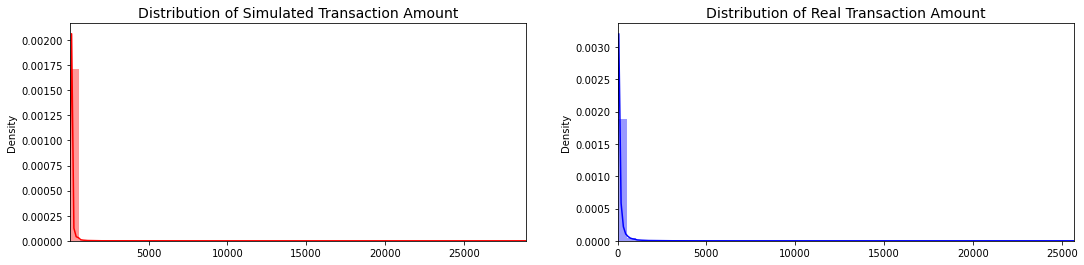

In [4]:
# Compare simulated and real amounts for non-fraud transactions
show_data(simulated_non_fraud_samples["Amount"], kaggle_non_fraud_samples["Amount"], "non-fraud", "Amount")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |              9651.0 |               492.0|              +9159.0 |
|   Mean |   530.6614122888789 |  122.21132113821133|   +408.4500911506675 |
|    Std |  391.02887272100094 |  256.68328829771207|  +134.34558442328887 |
|    Min |                1.06 |                 0.0|                +1.06 |
|    25% |             240.075 |                 1.0|             +239.075 |
|    50% |               390.0 |                9.25|              +380.75 |
|    75% |             902.365 |              105.89|             +796.475 |
|    Max |             1376.04 |             2125.87|   -749.8299999999999 |
----------------------------------------------------------------------------


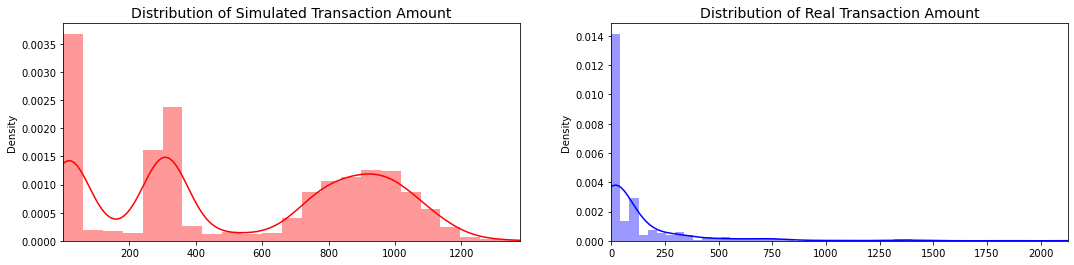

In [5]:
# Compare simulated and real amounts for fraud transactions
show_data(simulated_fraud_samples["Amount"], kaggle_fraud_samples["Amount"], "fraud", "Amount")

## Comparing similar sample sizes

Sampled from Simulated set:
 Non-Fraud: 284315
     Fraud: 492
----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |            284315.0 |            284315.0|                 +0.0 |
|   Mean |   67.26891820691912 |   88.29102242225574|   -21.02210421533661 |
|    Std |   144.6967110121251 |  250.10509222586853|  -105.40838121374344 |
|    Min |                 1.0 |                 0.0|                 +1.0 |
|    25% |                9.56 |                5.65|                +3.91 |
|    50% |               47.13 |                22.0|  +25.130000000000003 |
|    75% |               82.53 |               77.05|   +5.480000000000004 |
|    Max |            19364.91 |            25691.16|             -6326.25 |
----------------------------------------------------------------------------


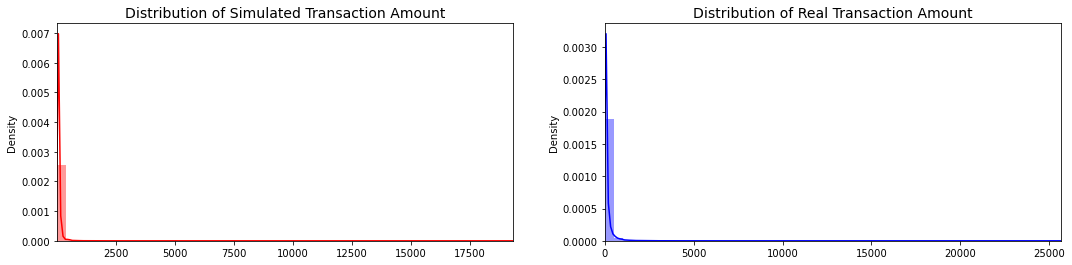

In [6]:
# Select same number of samples for simulated set as real kaggle set
simulated_non_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 0].sample(n=kaggle_non_fraud_counts)
simulated_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 1].sample(n=kaggle_fraud_counts)
print("Sampled from Simulated set:")
print(" Non-Fraud:", simulated_non_fraud_samples.shape[0])
print("     Fraud:", simulated_fraud_samples.shape[0])

# Compare simulated and real amounts for non-fraud transactions
show_data(simulated_non_fraud_samples["Amount"], kaggle_non_fraud_samples["Amount"], "non-fraud", "Amount")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |               492.0 |               492.0|                 +0.0 |
|   Mean |   523.9403658536585 |  122.21132113821133|   +401.7290447154471 |
|    Std |    396.094611332376 |  256.68328829771207|  +139.41132303466395 |
|    Min |                2.48 |                 0.0|                +2.48 |
|    25% |            117.1825 |                 1.0|            +116.1825 |
|    50% |              409.32 |                9.25|              +400.07 |
|    75% |             902.605 |              105.89|             +796.715 |
|    Max |             1313.18 |             2125.87|   -812.6899999999998 |
----------------------------------------------------------------------------


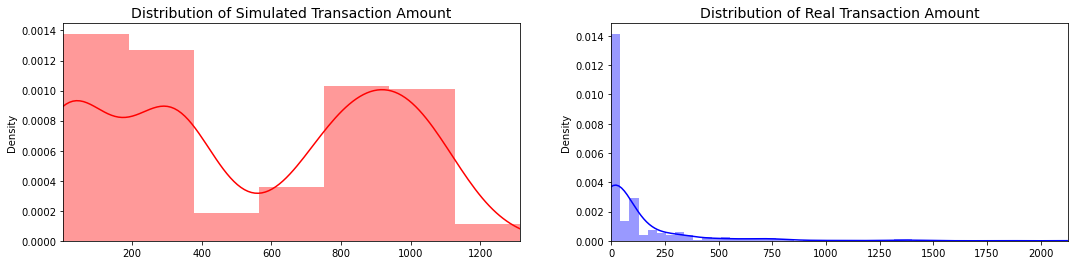

In [7]:
# Compare simulated and real amounts for fraud transactions
show_data(simulated_fraud_samples["Amount"], kaggle_fraud_samples["Amount"], "fraud", "Amount")

# Comparing Time

In [8]:
simulated_non_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 0]
simulated_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 1]

----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |           1842743.0 |            284315.0|           +1558428.0 |
|   Mean |   33315751.69294579 |   94838.20225805884|   +33220913.49068773 |
|    Std |   18194821.00869158 |    47484.0157855503|   +18147336.99290603 |
|    Min |                 0.0 |                 0.0|                 +0.0 |
|    25% |          17669417.5 |             54230.0|          +17615187.5 |
|    50% |          31746876.0 |             84711.0|          +31662165.0 |
|    75% |          49228047.0 |            139333.0|          +49088714.0 |
|    Max |          63158356.0 |            172792.0|          +62985564.0 |
----------------------------------------------------------------------------


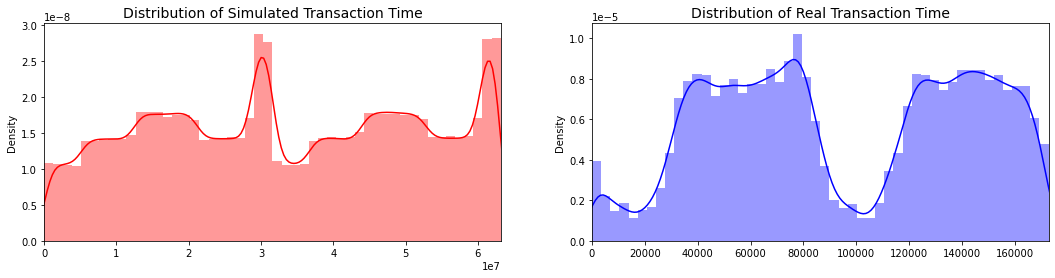

In [9]:
# Compare simulated and real times for fraud transactions
show_data(simulated_non_fraud_samples["Time"], kaggle_non_fraud_samples["Time"], "non-fraud", "Time")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |              9651.0 |               492.0|              +9159.0 |
|   Mean |  29947074.340172004 |   80746.80691056911|  +29866327.533261433 |
|    Std |  17933616.897800952 |   47835.36513767505|   +17885781.53266328 |
|    Min |             90379.0 |               406.0|             +89973.0 |
|    25% |          14143777.5 |             41241.5|          +14102536.0 |
|    50% |          29899632.0 |             75568.5|          +29824063.5 |
|    75% |          45190695.0 |            128483.0|          +45062212.0 |
|    Max |          62378001.0 |            170348.0|          +62207653.0 |
----------------------------------------------------------------------------


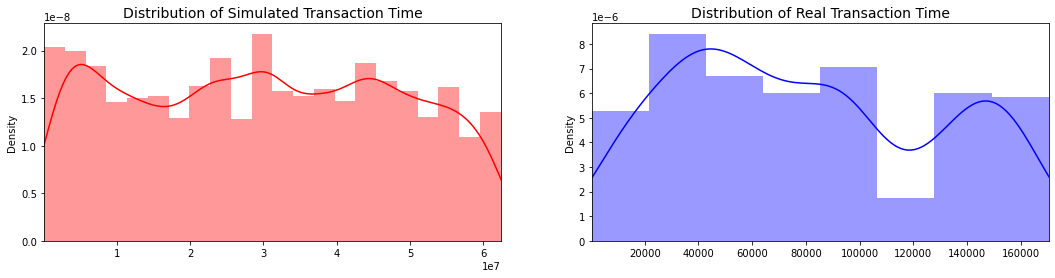

In [10]:
# Compare simulated and real times for fraud transactions
show_data(simulated_fraud_samples["Time"], kaggle_fraud_samples["Time"], "fraud", "Time")

## Comparing Same Range

In [11]:
last_kaggle_time = max(kaggle_non_fraud_samples["Time"])

simulated_non_fraud_times = simulated_non_fraud_samples.loc[simulated_non_fraud_samples["Time"] <= last_kaggle_time]
simulated_fraud_times = simulated_fraud_samples.loc[simulated_fraud_samples["Time"] <= last_kaggle_time]

simulated_non_fraud_times = simulated_non_fraud_times["Time"]
simulated_fraud_times = simulated_fraud_times["Time"]

----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |              3526.0 |            284315.0|            -280789.0 |
|   Mean |   75418.29211571185 |   94838.20225805884|  -19419.910142346984 |
|    Std |   47183.88788254583 |    47484.0157855503|  -300.12790300446795 |
|    Min |                 0.0 |                 0.0|                 +0.0 |
|    25% |             40106.5 |             54230.0|             -14123.5 |
|    50% |             67018.5 |             84711.0|             -17692.5 |
|    75% |           109719.25 |            139333.0|            -29613.75 |
|    Max |            172786.0 |            172792.0|                 -6.0 |
----------------------------------------------------------------------------


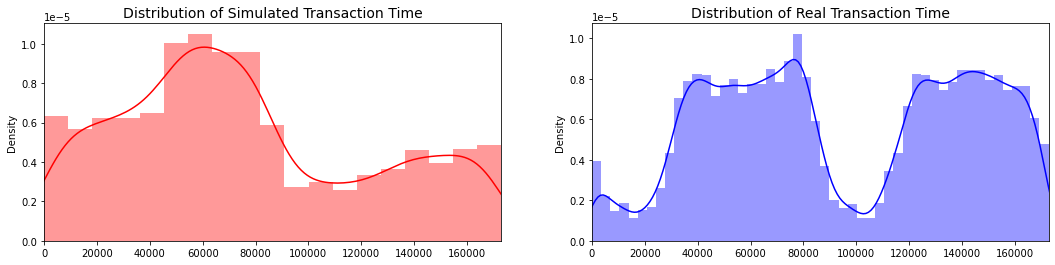

In [12]:
# Compare simulated and real times for fraud transactions
show_data(simulated_non_fraud_times, kaggle_non_fraud_samples["Time"], "non-fraud", "Time")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |                 7.0 |               492.0|               -485.0 |
|   Mean |  112641.28571428571 |   80746.80691056911|    +31894.4788037166 |
|    Std |  30328.731046727982 |   47835.36513767505|  -17506.634090947067 |
|    Min |             90379.0 |               406.0|             +89973.0 |
|    25% |             95168.0 |             41241.5|             +53926.5 |
|    50% |             99465.0 |             75568.5|             +23896.5 |
|    75% |            117999.5 |            128483.0|             -10483.5 |
|    Max |            172310.0 |            170348.0|              +1962.0 |
----------------------------------------------------------------------------


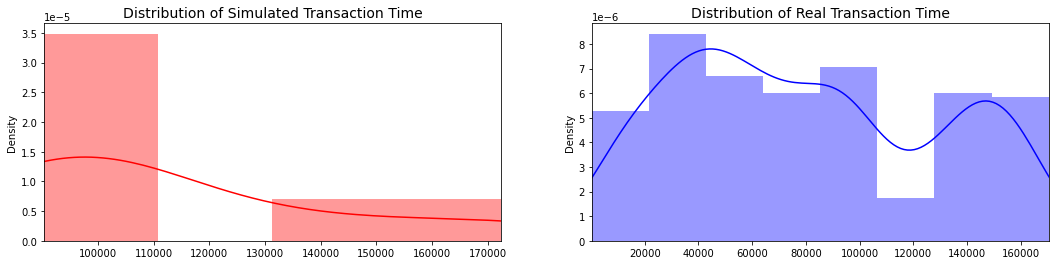

In [13]:
# Compare simulated and real times for fraud transactions
show_data(simulated_fraud_times, kaggle_fraud_samples["Time"], "fraud", "Time")

## Comparing Random Sample

In [14]:
simulated_non_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 0].sample(n=kaggle_non_fraud_counts)
simulated_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 1].sample(n=kaggle_fraud_counts)

----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |            284315.0 |            284315.0|                 +0.0 |
|   Mean |   33282277.11965953 |   94838.20225805884|  +33187438.917401474 |
|    Std |  18206083.909500856 |    47484.0157855503|  +18158599.893715307 |
|    Min |               542.0 |                 0.0|               +542.0 |
|    25% |          17608853.0 |             54230.0|          +17554623.0 |
|    50% |          31617147.0 |             84711.0|          +31532436.0 |
|    75% |          49211976.0 |            139333.0|          +49072643.0 |
|    Max |          63158356.0 |            172792.0|          +62985564.0 |
----------------------------------------------------------------------------


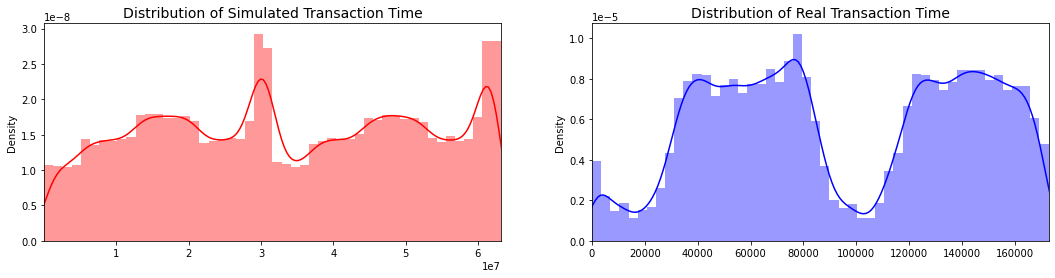

In [15]:
# Compare simulated and real times for fraud transactions
show_data(simulated_non_fraud_samples["Time"], kaggle_non_fraud_samples["Time"], "non-fraud", "Time")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |               492.0 |               492.0|                 +0.0 |
|   Mean |  29085290.506097563 |   80746.80691056911|  +29004543.699186992 |
|    Std |   17759208.38956033 |   47835.36513767505|  +17711373.024422657 |
|    Min |            255506.0 |               406.0|            +255100.0 |
|    25% |         14054067.75 |             41241.5|         +14012826.25 |
|    50% |          28982197.5 |             75568.5|          +28906629.0 |
|    75% |          44103996.0 |            128483.0|          +43975513.0 |
|    Max |          62120038.0 |            170348.0|          +61949690.0 |
----------------------------------------------------------------------------


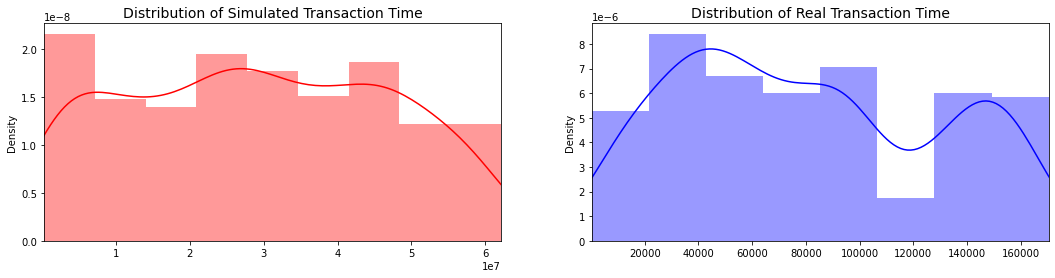

In [16]:
# Compare simulated and real times for fraud transactions
show_data(simulated_fraud_samples["Time"], kaggle_fraud_samples["Time"], "fraud", "Time")

## Comparing "Similar" Shape

There's a small "valley" type shape in the simualted dataset which is the only thing I can really see that's closest to the real dataset's shape

----------------------------------------------------------------------------
| FIELDS | SIMULATED NON-FRAUD |   REAL NON-FRAUD   | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |           1306129.0 |            284315.0|           +1021814.0 |
|   Mean |  22465631.174907684 |   94838.20225805884|  +22370792.972649626 |
|    Std |  12903426.621561402 |    47484.0157855503|  +12855942.605775852 |
|    Min |                 0.0 |                 0.0|                 +0.0 |
|    25% |          10561148.0 |             54230.0|          +10506918.0 |
|    50% |          23222705.0 |             84711.0|          +23137994.0 |
|    75% |          33492125.0 |            139333.0|          +33352792.0 |
|    Max |          43158309.0 |            172792.0|          +42985517.0 |
----------------------------------------------------------------------------


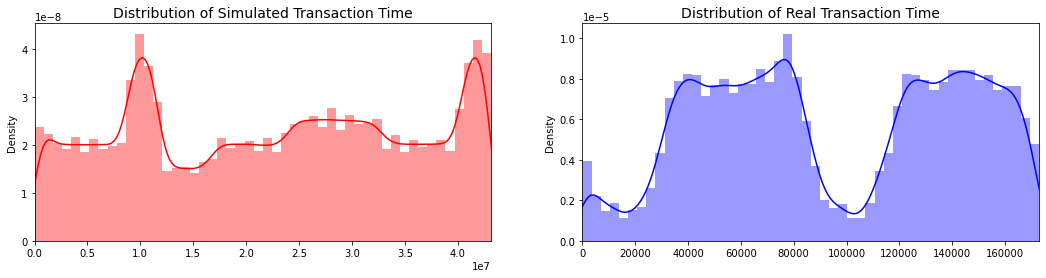

In [17]:
simulated_non_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 0]
simulated_fraud_samples = simulated_dataset.loc[simulated_dataset["Class"] == 1]

lower_range = 20000000

simulated_non_fraud_times = simulated_non_fraud_samples.loc[lower_range <= simulated_non_fraud_samples["Time"]]
simulated_fraud_times = simulated_fraud_samples.loc[lower_range <= simulated_fraud_samples["Time"]]

simulated_non_fraud_times = simulated_non_fraud_times["Time"]
simulated_fraud_times = simulated_fraud_times["Time"]

simulated_non_fraud_times -= min(simulated_non_fraud_times)
simulated_fraud_times -= min(simulated_fraud_times)

# Compare simulated and real times for fraud transactions
show_data(simulated_non_fraud_times, kaggle_non_fraud_samples["Time"], "non-fraud", "Time")

----------------------------------------------------------------------------
| FIELDS |   SIMULATED FRAUD   |     REAL FRAUD     | DIFFERENCE FROM REAL |
----------------------------------------------------------------------------
|  Count |              6453.0 |               492.0|              +5961.0 |
|   Mean |  20234634.736711606 |   80746.80691056911|  +20153887.929801036 |
|    Std |  12002944.476298267 |   47835.36513767505|  +11955109.111160591 |
|    Min |                 0.0 |               406.0|               -406.0 |
|    25% |           9870163.0 |             41241.5|           +9828921.5 |
|    50% |          20072964.0 |             75568.5|          +19997395.5 |
|    75% |          30352821.0 |            128483.0|          +30224338.0 |
|    Max |          42358777.0 |            170348.0|          +42188429.0 |
----------------------------------------------------------------------------


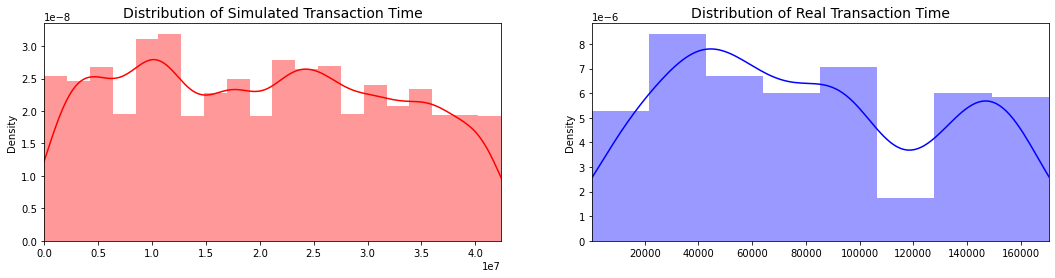

In [18]:
# Compare simulated and real times for fraud transactions
show_data(simulated_fraud_times, kaggle_fraud_samples["Time"], "fraud", "Time")